# PROBLEM SET -3

## QUESTION 1
### Introduction:
### Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
### Occupations
### Step 1. Import the necessary libraries
### Step 2. Import the dataset from this address.
### Step 3. Assign it to a variable called users
### Step 4. Discover what is the mean age per occupation
### Step 5. Discover the Male ratio per occupation and sort it from the most to the least
### Step 6. For each occupation, calculate the minimum and maximum ages
### Step 7. For each combination of occupation and sex, calculate the mean age
### Step 8. For each occupation present the percentage of women and men


In [2]:
#step 1 - Importing necessary libraries
import pandas as pd
import numpy as np

#step 2 and step 3
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
#step 4 - Mean age per occupation
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
#step 5 - Male ratio per occupation and sort it from the most to the least
users['Is_male'] = users.gender.apply(lambda x: 1 if x == 'M' else 0)
users.Is_male

0      1
1      0
2      1
3      1
4      0
      ..
938    0
939    1
940    1
941    0
942    1
Name: Is_male, Length: 943, dtype: int64

In [7]:
(users.groupby('occupation').Is_male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [6]:
#step 6 - For each occupation, calculate the minimum and maximum ages

users.groupby('occupation').age.agg(['min', 'max'])


,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [8]:
#Step 7 - For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [9]:
#step 8 -  For each occupation present the percentage of women and men

occp_gnd_count= users.groupby(['occupation','gender']).agg({'gender':'count'})

occp_count = users.groupby(['occupation']).count()

percent = occp_gnd_count.div(occp_count,level='occupation') * 100

# Just printing the gender and percentages of different occupations
percent.loc[:,'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

## Question 2
### Euro Teams
### Step 1. Import the necessary libraries
### Step 2. Import the dataset from this address
### Step 3. Assign it to a variable called euro12
### Step 4. Select only the Goal column
### Step 5. How many team participated in the Euro2012?
### Step 6. What is the number of columns in the dataset?
### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
### Step 8. Sort the teams by Red Cards, then to Yellow Cards
### Step 9. Calculate the mean Yellow Cards given per Team
### Step 10. Filter teams that scored more than 6 goals
### Step 11. Select the teams that start with G
### Step 12. Select the first 7 columns
### Step 13. Select all columns except the last 3
### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [10]:
#step 1,2,3 
import pandas as pd
import numpy as np
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [11]:
#step 4 - Select only the Goal column
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [12]:
#Step 5 - How many team participated in the Euro2012?
euro12.Team.count()

16

In [13]:
#Step 6-  What is the number of columns in the dataset?
euro12.shape[1]

35

In [14]:
#Step 7 - View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [15]:
# step 8 - Sort the teams by Red Cards, then to Yellow Cards
Sort_red = discipline.sort_values('Red Cards', ascending= False )
Sorted_data= Sort_red.sort_values('Yellow Cards', ascending= False)
Sorted_data

,Team,Yellow Cards,Red Cards
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
6,Greece,9,1
0,Croatia,9,0
9,Poland,7,1
1,Czech Republic,7,0
14,Sweden,7,0
11,Republic of Ireland,6,1
4,France,6,0


In [16]:
#Step 9 - Calculate the mean Yellow Cards given per Team
discipline['Yellow Cards'].mean()

7.4375

In [17]:
# Step 10 -  Filter teams that scored more than 6 goals
euro12[euro12.Goals>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [18]:
# Step 11 - Select the teams that start with G
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [19]:
# step 12 - Select the first 7 columns
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [20]:
# Step 13 - Select all columns except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [22]:
# step 14 -  Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3
### Housing
### Step 1. Import the necessary libraries
### Step 2. Create 3 differents Series, each of length 100, as follows:
### • The first a random number from 1 to 4
### • The second a random number from 1 to 3
### • The third a random number from 10,000 to 30,000
### Step 3. Create a DataFrame by joinning the Series by column
### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
### Step 6. Ops it seems it is going only until index 99. Is it true?
### Step 7. Reindex the DataFrame so it goes from 0 to 299


In [23]:
#step 1
import pandas as pd
import numpy as np
import random

In [24]:
#step 2, 3 , 4
First = pd.Series(np.random.randint(1,5,100))
Second = pd.Series(np.random.randint(1,4,100))
Third = pd.Series(np.random.randint(10000,30001,100))
df= pd.DataFrame({'First':First, 'Second': Second,'Third':Third})
df.columns = ['bedrs','bathrs','price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,2,3,22031
1,2,3,29666
2,2,2,16136
3,2,2,18936
4,4,2,17566
...,...,...,...
95,4,3,27404
96,3,2,12604
97,1,3,14879
98,4,2,18251


In [26]:
# step 5
bigcolumn = pd.concat([First,Second,Third],axis=0)
bigcolumn

0         2
1         2
2         2
3         2
4         4
      ...  
95    27404
96    12604
97    14879
98    18251
99    24000
Length: 300, dtype: int32

In [27]:
# step 6 - Ops it seems it is going only until index 99. Is it true?
# Sol: Yes, its only going till 99th index.

In [43]:
# step 7
bigcolumn.reset_index(drop=True).reindex(range(300))
bigcolumn

0          2
1          2
2          2
3          2
4          4
       ...  
295    27404
296    12604
297    14879
298    18251
299    24000
Length: 300, dtype: int32

## Question 4

In [123]:
#Step1
import pandas as pd
import numpy as np
import datetime as dt

In [124]:
# step2
data = pd.read_csv('wind.txt', sep='\s+')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [125]:
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data["DateTime"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,DateTime
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [126]:
#step 4
# We will be subtracting 100 from the years greater than 2061
data.loc[data['DateTime'].dt.year >= 2061, 'DateTime'] -= pd.DateOffset(years=100)

# Drop the original Yr, Mo, and Dy columns
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)

# Show the updated DataFrame
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,DateTime
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [127]:
#step 5
data.set_index("DateTime", inplace=True)

In [128]:
#step 6
# total NaN values in  each column in 'data'
Values_missing = data.isnull().sum()
Values_missing

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [129]:
#step 7
Total_missing_values = data.count().sum()
Total_missing_values

78857

In [130]:
#step 8 
Mean_windspeed = data.mean().mean()
Mean_windspeed

10.227982360836924

In [131]:
#step 9
loc_stats = data.iloc[:, :-1].agg(['min', 'max', 'mean', 'std']).T
loc_stats.columns = ['Min', 'Max', 'Mean', 'Std']
loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [132]:
#step 10
day_stats = data.iloc[:, :-1].agg(['min', 'max', 'mean', 'std'], axis=1)
day_stats

,min,max,mean,std
DateTime,,,,
1961-01-01,9.29,18.50,12.816000,2.875205
1961-01-02,6.50,17.54,11.087000,3.246482
1961-01-03,6.17,18.50,11.535000,3.863068
1961-01-04,1.79,11.75,6.231818,3.044716
1961-01-05,6.17,13.33,10.520909,2.533900
...,...,...,...,...
1978-12-27,8.08,17.62,14.583636,2.916852
1978-12-28,5.00,21.79,12.758182,5.265504
1978-12-29,8.71,19.17,13.554545,3.593590


In [133]:
#step 11
jan_check = (data.index.month == 1)
jan_value = data[jan_check]
jan_mean = jan_value.mean()

jan_mean

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [134]:
#step 12
yearly_freq = data.resample('Y').mean()
yearly_freq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DateTime,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [135]:
#step 13
Monthly_freq = data.resample('M').mean()
Monthly_freq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DateTime,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [136]:
#step 14
Weekly_freq = data.resample('W').mean()
Weekly_freq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DateTime,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [71]:
#step 15
windspeed_data = data.loc['1961-01-02':'1961-12-31'].resample('W').agg(['min', 'max', 'mean', 'std'])
windspeed_data.head(52)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
DateTime                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

## Question 5

In [38]:
#step 1,2,3
import pandas as pd
import numpy as np
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')


In [39]:
#step -4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [43]:
#step 5
chipo.order_id.count()

4622

In [44]:
#step 6
chipo.shape[1]

5

In [45]:
#step 7
for c in chipo.columns:
    print(c)

order_id
quantity
item_name
choice_description
item_price


In [46]:
#step 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [72]:
#step 9 
chipo.groupby('item_name').sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [73]:
#step 10
chipo.groupby('item_name').sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [74]:
#step 11
chipo.groupby('choice_description').sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [75]:
#step 12
chipo['quantity'].sum()

4972

In [82]:
# Step 13 (a),(b)
#Turn the item price into a float
chipo.astype({'item_price': 'float'}).dtypes
# Check the item price type
print(chipo['item_price'].dtype)

float64


In [83]:
# step 13 (c),(d)
#Create a lambda function and change the type of item price

if chipo['item_price'].dtype == 'object':
    chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
    
#Check the item price type
print(chipo['item_price'].dtype)

float64


In [86]:
#step 14
chipo['item_total'] = chipo['quantity'] * chipo['item_price']
Total_revenue = chipo['item_total'].sum()

round(Total_revenue, 2)

39237.02

In [87]:
#step 15
total_orders = chipo['order_id'].nunique()
total_orders

1834

In [89]:
#step 16
average_revenue = total_revenue / total_orders
round(average_revenue, 2)

21.39

In [90]:
#step 17
count_of_items = chipo['item_name'].nunique()
count_of_items

50

## Question 6
### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

In [91]:
import pandas as pd 
status = pd.read_csv('us-marriages-divorces-1867-2014.csv')

Text(0, 0.5, 'Rate per 1000 persons')

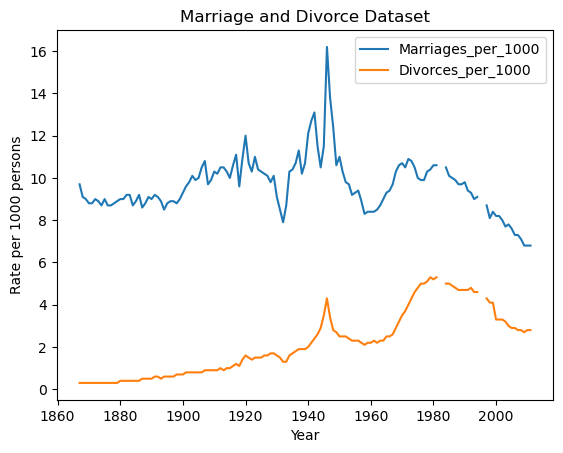

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots()

columns = status.columns.drop(['Year','Marriages','Divorces', 'Population'])

x_data= status.Year
order=range(1866, 2015)

for column in columns:
    axis.plot(x_data, status[column])

axis.set_title('Marriage and Divorce Dataset')
axis.legend(columns)
axis.set_xlabel('Year')
axis.set_ylabel('Rate per 1000 persons')

## Question 7
### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.Don't forget to label your axes!

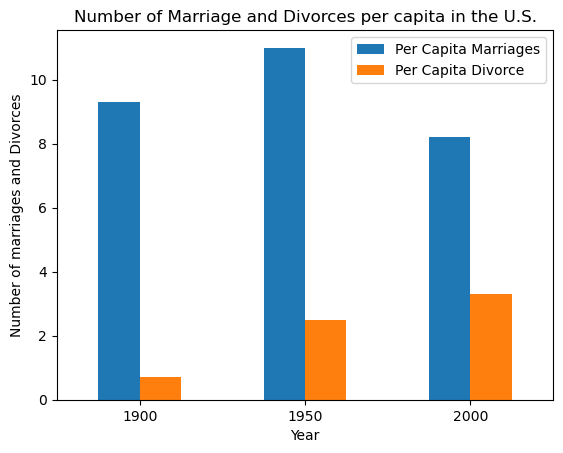

In [104]:

divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
divorce_data = divorce_data[
    divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = divorce_data['Year'].values
marriages_per_capita = divorce_data['Marriages_per_1000'].values
divorces_per_capita = divorce_data['Divorces_per_1000'].values

df = pd.DataFrame({'Per Capita Marriages': marriages_per_capita,
                   'Per Capita Divorce': divorces_per_capita}, index=years)
ax = df.plot.bar(rot=0)

plt.xlabel("Year")
plt.ylabel("Number of marriages and Divorces")
plt.title('Number of Marriage and Divorces per capita in the U.S.')
plt.legend()
plt.show()

## Question 8
### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.Don't forget to label your axes!

In [105]:
import pandas as pd 
hollywood_kill = pd.read_csv('actor_kill_counts.csv') 

Text(0, 0.5, 'Name of Actor')

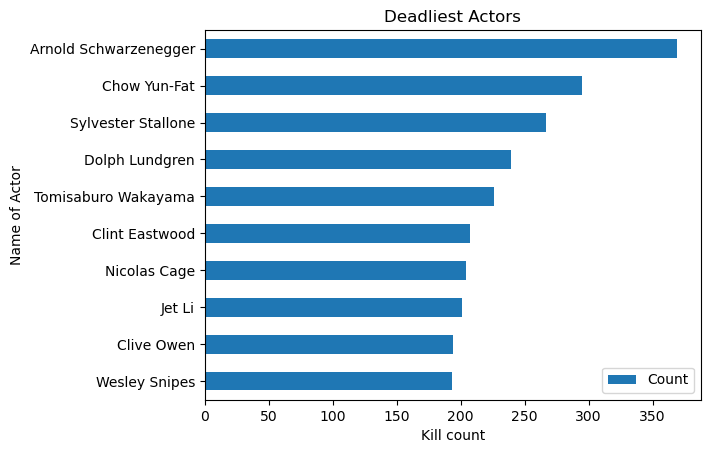

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

hollywood_kill.sort_values("Count", ascending = True).plot.barh('Actor','Count')
plt.title('Deadliest Actors')
plt.xlabel('Kill count')
plt.ylabel('Name of Actor')


## Question 9
### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
### Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown ### of the categories

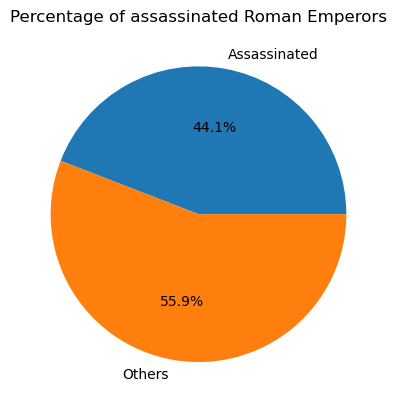

In [113]:
df = pd.read_csv("roman-emperor-reigns.csv")

# assassinated emperors
assassinated_emperors = df[df["Cause_of_Death"].str.contains("assassinated", case=False)].shape[0]

# not assassinated
other_count = df.shape[0] - assassinated_emperors

plt.pie([assassinated_emperors, other_count], labels=["Assassinated", "Others"], autopct="%1.1f%%")
plt.title("Percentage of assassinated Roman Emperors")

plt.show()

## Question 10
### Create a scatter plot showing the relationship between the total revenue earned by arcades and the  number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your  axes!Color each dot according to its year

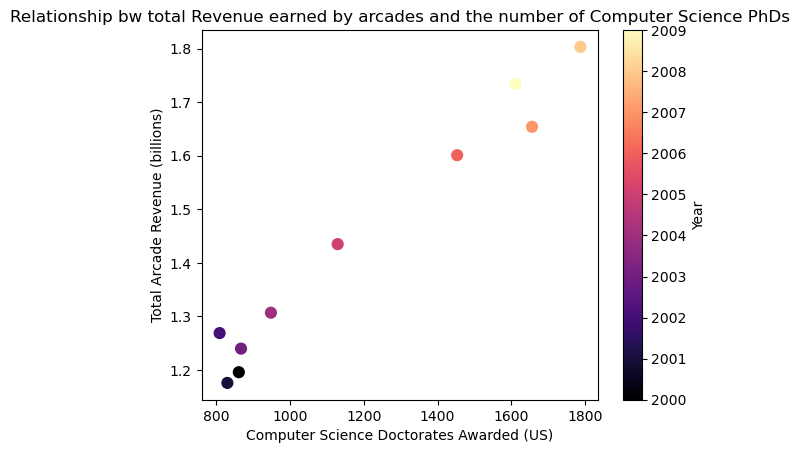

In [120]:
revenue = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
revenue

fig, ax = plt.subplots()
revenue.plot.scatter(x = 'Computer Science Doctorates Awarded (US)', y = 'Total Arcade Revenue (billions)',s=60,c = 'Year',colormap='magma',ax=ax)
ax.set_title('Relationship bw total Revenue earned by arcades and the number of Computer Science PhDs')

plt.show()